In [341]:
from requests import get

In [342]:
import pandas as pd
import bs4
import re
import numpy as np

In [345]:
%matplotlib inline

In [346]:
import matplotlib as plt

### On commence par récupérer les résultats du top 5 Ligue 1 

In [347]:
chemin_PSG = "https://www.lequipe.fr/Football/FootballFicheEquipe26.html"
chemin_Lyon = "https://www.lequipe.fr/Football/FootballFicheEquipe22.html"
chemin_Marseille = "https://www.lequipe.fr/Football/FootballFicheEquipe6.html"
chemin_Monaco = "https://www.lequipe.fr/Football/FootballFicheEquipe25.html"
chemin_StEtienne = "https://www.lequipe.fr/Football/FootballFicheEquipe38.html"

In [348]:
page_PSG = get(chemin_PSG)
page_OL = get(chemin_Lyon)
page_OM = get(chemin_Marseille)
page_ASM = get(chemin_Monaco)
page_STE = get(chemin_StEtienne)

if page_PSG.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_OL.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_OM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_ASM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_STE.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé


In [349]:
texte_PSG = page_PSG.text
texte_OL = page_OL.text
texte_OM = page_OM.text
texte_ASM = page_ASM.text
texte_STE = page_STE.text

In [350]:
arbre_PSG = bs4.BeautifulSoup(texte_PSG, "lxml")
arbre_OL = bs4.BeautifulSoup(texte_OL, "lxml")
arbre_OM = bs4.BeautifulSoup(texte_OM, "lxml")
arbre_ASM = bs4.BeautifulSoup(texte_ASM, "lxml")
arbre_STE = bs4.BeautifulSoup(texte_STE, "lxml")

In [351]:
club_PSG = arbre_PSG.h1.text.replace("\n", "")
club_OL = arbre_OL.h1.text.replace("\n", "")
club_OM = arbre_OM.h1.text.replace("\n", "")
club_ASM = arbre_ASM.h1.text.replace("\n", "")
club_STE = arbre_STE.h1.text.replace("\n", "")

In [352]:
print(club_PSG)
print(club_OL)
print(club_OM)
print(club_ASM)
print(club_STE)

PARIS-SG (PSG)
LYON (OL)
MARSEILLE (OM)
MONACO (ASM)
SAINT-ETIENNE (ASSE)


In [353]:
div_fille_PSG = arbre_PSG.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_PSG)[0:1000]
div_fille_OL = arbre_OL.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_OL)[0:1000]
div_fille_OM = arbre_OM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_OM)[0:1000]
div_fille_ASM = arbre_ASM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_ASM)[0:1000]
div_fille_STE = arbre_STE.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_STE)[0:1000]

'<section class="Palmares calendrierclub"><h2 class="titre-barre category-expand">Calendrier Saint-Etienne</h2><section class="data-content category-expand-list"> <!-- content --><table><tr><td class="titre-ss-barre" colspan="5">Résultats 2019-2020</td></tr> <tr class="alternate1"> <td class="date">9/07/19</td> <td class="competition"><strong>MA</strong> <br/><strong>Matches amicaux L1</strong> <br/>Matches amicaux</td><td class="equipe equipe1"><a href="/Football/FootballFicheClub309.html#POUSSE">          Andrézieux</a><a></a></td><td class="score"><a href="/Football/match-direct/matches-amicaux-l1-intersaison/2019-2020/andrezieux-saint-etienne-live/453564#POUSSE"><strong><span style="color: #38B013">1-2<span style="font-size:0.625rem;"></span></span></strong></a></td><td class="equipe equipe2"><a href="/Football/FootballFicheClub38.html#POUSSE"> <strong>Saint-Étien.</strong> </a> </td> </tr> <tr class="alternate2"> <td class="date">13/07/19</td> <td class="competition"><strong>MA</s

In [354]:
liste = []
liste.append(div_fille_PSG)
liste.append(div_fille_OL)
liste.append(div_fille_OM)
liste.append(div_fille_ASM)
liste.append(div_fille_STE)
for car in liste:
    all_ads = car.find("table").findAll("tr")
    print(len(all_ads))

34
35
30
31
36


In [355]:
list_all_ads_PSG = []
for ads in all_ads_PSG:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_PSG = []
for ads in all_ads_PSG:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_PSG.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_PSG,
                        })
    
list_all_ads_OL = []
for ads in all_ads_OL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_OL = []
for ads in all_ads_OL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_OL.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_OL,
                        })
    
list_all_ads_OM = []
for ads in all_ads_OM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_OM = []
for ads in all_ads_OM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_OM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_OM,
                        })
    
list_all_ads_ASM = []
for ads in all_ads_ASM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ASM = []
for ads in all_ads_ASM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ASM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_ASM,
                        })
    
list_all_ads_STE = []
for ads in all_ads_STE:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_STE = []
for ads in all_ads_STE:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_STE.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_STE,
                        })

In [356]:
df_match_PSG = pd.DataFrame(list_all_ads_PSG)
df_match_OL = pd.DataFrame(list_all_ads_OL)
df_match_OM = pd.DataFrame(list_all_ads_OM)
df_match_ASM = pd.DataFrame(list_all_ads_ASM)
df_match_STE = pd.DataFrame(list_all_ads_STE)

In [357]:
df_match_PSG.shape
df_match_OL.shape
df_match_OM.shape
df_match_ASM.shape
df_match_STE.shape

(36, 9)

In [358]:
df_match_PSG = df_match_PSG.drop([0,0],axis=0)
df_match_OL = df_match_OL.drop([0,0],axis=0)
df_match_OM = df_match_OM.drop([0,0],axis=0)
df_match_ASM = df_match_ASM.drop([0,0],axis=0)
df_match_STE = df_match_STE.drop([0,0],axis=0)

In [359]:
df_match_PSG.loc[(df_match_PSG.equipe1 == "Paris-SG") & (df_match_PSG.equipe1_goal > df_match_PSG.equipe2_goal), 'Bilan'] = 'V'
df_match_PSG.loc[(df_match_PSG.equipe1 == "Paris-SG") & (df_match_PSG.equipe1_goal < df_match_PSG.equipe2_goal), 'Bilan'] = 'D'
df_match_PSG.loc[(df_match_PSG.equipe1 == "Paris-SG") & (df_match_PSG.equipe1_goal == df_match_PSG.equipe2_goal), 'Bilan'] = 'N'
df_match_PSG.loc[(df_match_PSG.equipe2 == "Paris-SG") & (df_match_PSG.equipe1_goal > df_match_PSG.equipe2_goal), 'Bilan'] = 'D'
df_match_PSG.loc[(df_match_PSG.equipe2 == "Paris-SG") & (df_match_PSG.equipe1_goal < df_match_PSG.equipe2_goal), 'Bilan'] = 'V'
df_match_PSG.loc[(df_match_PSG.equipe2 == "Paris-SG") & (df_match_PSG.equipe1_goal == df_match_PSG.equipe2_goal), 'Bilan'] = 'N'

df_match_OL.loc[(df_match_OL.equipe1 == "Lyon") & (df_match_OL.equipe1_goal > df_match_OL.equipe2_goal), 'Bilan'] = 'V'
df_match_OL.loc[(df_match_OL.equipe1 == "Lyon") & (df_match_OL.equipe1_goal < df_match_OL.equipe2_goal), 'Bilan'] = 'D'
df_match_OL.loc[(df_match_OL.equipe1 == "Lyon") & (df_match_OL.equipe1_goal == df_match_OL.equipe2_goal), 'Bilan'] = 'N'
df_match_OL.loc[(df_match_OL.equipe2 == "Lyon") & (df_match_OL.equipe1_goal > df_match_OL.equipe2_goal), 'Bilan'] = 'D'
df_match_OL.loc[(df_match_OL.equipe2 == "Lyon") & (df_match_OL.equipe1_goal < df_match_OL.equipe2_goal), 'Bilan'] = 'V'
df_match_OL.loc[(df_match_OL.equipe2 == "Lyon") & (df_match_OL.equipe1_goal == df_match_OL.equipe2_goal), 'Bilan'] = 'N'

df_match_OM.loc[(df_match_OM.equipe1 == "Marseille") & (df_match_OM.equipe1_goal > df_match_OM.equipe2_goal), 'Bilan'] = 'V'
df_match_OM.loc[(df_match_OM.equipe1 == "Marseille") & (df_match_OM.equipe1_goal < df_match_OM.equipe2_goal), 'Bilan'] = 'D'
df_match_OM.loc[(df_match_OM.equipe1 == "Marseille") & (df_match_OM.equipe1_goal == df_match_OM.equipe2_goal), 'Bilan'] = 'N'
df_match_OM.loc[(df_match_OM.equipe2 == "Marseille") & (df_match_OM.equipe1_goal > df_match_OM.equipe2_goal), 'Bilan'] = 'D'
df_match_OM.loc[(df_match_OM.equipe2 == "Marseille") & (df_match_OM.equipe1_goal < df_match_OM.equipe2_goal), 'Bilan'] = 'V'
df_match_OM.loc[(df_match_OM.equipe2 == "Marseille") & (df_match_OM.equipe1_goal == df_match_OM.equipe2_goal), 'Bilan'] = 'N'

df_match_ASM.loc[(df_match_ASM.equipe1 == "Monaco") & (df_match_ASM.equipe1_goal > df_match_ASM.equipe2_goal), 'Bilan'] = 'V'
df_match_ASM.loc[(df_match_ASM.equipe1 == "Monaco") & (df_match_ASM.equipe1_goal < df_match_ASM.equipe2_goal), 'Bilan'] = 'D'
df_match_ASM.loc[(df_match_ASM.equipe1 == "Monaco") & (df_match_ASM.equipe1_goal == df_match_ASM.equipe2_goal), 'Bilan'] = 'N'
df_match_ASM.loc[(df_match_ASM.equipe2 == "Monaco") & (df_match_ASM.equipe1_goal > df_match_ASM.equipe2_goal), 'Bilan'] = 'D'
df_match_ASM.loc[(df_match_ASM.equipe2 == "Monaco") & (df_match_ASM.equipe1_goal < df_match_ASM.equipe2_goal), 'Bilan'] = 'V'
df_match_ASM.loc[(df_match_ASM.equipe2 == "Monaco") & (df_match_ASM.equipe1_goal == df_match_ASM.equipe2_goal), 'Bilan'] = 'N'

df_match_STE.loc[(df_match_STE.equipe1 == "Saint-Étien.") & (df_match_STE.equipe1_goal > df_match_STE.equipe2_goal), 'Bilan'] = 'V'
df_match_STE.loc[(df_match_STE.equipe1 == "Saint-Étien.") & (df_match_STE.equipe1_goal < df_match_STE.equipe2_goal), 'Bilan'] = 'D'
df_match_STE.loc[(df_match_STE.equipe1 == "Saint-Étien.") & (df_match_STE.equipe1_goal == df_match_STE.equipe2_goal), 'Bilan'] = 'N'
df_match_STE.loc[(df_match_STE.equipe2 == "Saint-Étien.") & (df_match_STE.equipe1_goal > df_match_STE.equipe2_goal), 'Bilan'] = 'D'
df_match_STE.loc[(df_match_STE.equipe2 == "Saint-Étien.") & (df_match_STE.equipe1_goal < df_match_STE.equipe2_goal), 'Bilan'] = 'V'
df_match_STE.loc[(df_match_STE.equipe2 == "Saint-Étien.") & (df_match_STE.equipe1_goal == df_match_STE.equipe2_goal), 'Bilan'] = 'N'

# Jointure club ligue 1

In [360]:
base_L1 = pd.concat([df_match_PSG,df_match_OL,df_match_OM,df_match_ASM, df_match_STE],ignore_index = True)

In [361]:
base_L1.loc[(base_L1.competition == 'MA'), 'Competition_bis'] = 'Amicaux'
base_L1.loc[(base_L1.competition == 'TC'), 'Competition_bis'] = 'CoupeNat'
base_L1.loc[(base_L1.competition == 'CL'), 'Competition_bis'] = 'CoupeNat'
base_L1.loc[(base_L1.competition == 'CO'), 'Competition_bis'] = 'CoupeNat'
base_L1.loc[(base_L1.competition == 'L1'), 'Competition_bis'] = 'Championnat'
base_L1.loc[(base_L1.competition == 'C1'), 'Competition_bis'] = 'LDC'
base_L1.loc[(base_L1.competition == 'C3'), 'Competition_bis'] = 'C3'

In [362]:
base_L1

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis
0,7,2019-07-16,DynamoDresde,MA,1-6,Paris-SG,1,6,PARIS-SG (PSG),V,Amicaux
1,7,2019-07-20,Nuremberg,MA,1-1,Paris-SG,1,1,PARIS-SG (PSG),N,Amicaux
2,7,2019-07-27,Paris-SG,MA,1-1,InterMilan,1,1,PARIS-SG (PSG),N,Amicaux
3,7,2019-07-30,Paris-SG,MA,3-0,SydneyFC,3,0,PARIS-SG (PSG),V,Amicaux
4,3,2019-03-08,Paris-SG,TC,2-1,Rennes,2,1,PARIS-SG (PSG),V,CoupeNat
...,...,...,...,...,...,...,...,...,...,...,...
156,12,2019-12-18,Nîmes,CL,1-2,Saint-Étien.,1,2,SAINT-ETIENNE (ASSE),V,CoupeNat
157,12,2019-12-21,Strasbourg,L1,2-1,Saint-Étien.,2,1,SAINT-ETIENNE (ASSE),D,Championnat
158,5,2020-05-01,Bastia-Borgo,CO,0-3,Saint-Étien.,0,3,SAINT-ETIENNE (ASSE),V,CoupeNat
159,8,2020-08-01,Paris-SG,CL,6-1,Saint-Étien.,6,1,SAINT-ETIENNE (ASSE),D,CoupeNat


# Top 5 championnat espagnol

In [363]:
chemin_RM = "https://www.lequipe.fr/Football/FootballFicheEquipe108.html"
chemin_BAR = "https://www.lequipe.fr/Football/FootballFicheEquipe98.html"
chemin_SEV = "https://www.lequipe.fr/Football/FootballFicheEquipe677.html"
chemin_AM = "https://www.lequipe.fr/Football/FootballFicheEquipe111.html"
chemin_VAL = "https://www.lequipe.fr/Football/FootballFicheEquipe112.html"

In [364]:
page_RM = get(chemin_RM)
page_BAR = get(chemin_BAR)
page_SEV = get(chemin_SEV)
page_AM = get(chemin_AM)
page_VAL = get(chemin_VAL)

if page_RM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_BAR.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_SEV.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_AM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_VAL.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé


In [365]:
texte_RM = page_RM.text
texte_BAR = page_BAR.text
texte_SEV = page_SEV.text
texte_AM = page_AM.text
texte_VAL = page_VAL.text

In [366]:
arbre_BAR = bs4.BeautifulSoup(texte_BAR, "lxml")
arbre_SEV = bs4.BeautifulSoup(texte_SEV, "lxml")
arbre_VAL = bs4.BeautifulSoup(texte_VAL, "lxml")
arbre_AM = bs4.BeautifulSoup(texte_AM, "lxml")
arbre_RM = bs4.BeautifulSoup(texte_RM, "lxml")

In [367]:
club_BAR = arbre_BAR.h1.text.replace("\n", "")
club_SEV = arbre_SEV.h1.text.replace("\n", "")
club_VAL = arbre_VAL.h1.text.replace("\n", "")
club_AM = arbre_AM.h1.text.replace("\n", "")
club_RM = arbre_RM.h1.text.replace("\n", "")

In [368]:
print(club_BAR)
print(club_SEV)
print(club_VAL)
print(club_AM)
print(club_RM)

FC BARCELONE
SEVILLE FC
VALENCE CF
ATLETICO DE MADRID
REAL MADRID


In [369]:
div_fille_BAR = arbre_BAR.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_BAR)[0:1000]
div_fille_SEV = arbre_SEV.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_SEV)[0:1000]
div_fille_VAL = arbre_VAL.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_VAL)[0:1000]
div_fille_AM = arbre_AM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_AM)[0:1000]
div_fille_RM = arbre_RM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_RM)[0:1000]

'<section class="Palmares calendrierclub"><h2 class="titre-barre category-expand">Calendrier Real Madrid</h2><section class="data-content category-expand-list"> <!-- content --><table><tr><td class="titre-ss-barre" colspan="5">Résultats 2019-2020</td></tr> <tr class="alternate1"> <td class="date">17/08/19</td> <td class="competition"><strong>CH</strong> <br/>1re journée</td><td class="equipe equipe1"><a href="/Football/FootballFicheClub110.html#POUSSE">          Celta Vigo</a><a></a></td><td class="score"><a href="/Football/match-direct/championnat-d-espagne/2019-2020/celta-vigo-real-madrid-live/454314#POUSSE"><strong><span style="color: #38B013">1-3<span style="font-size:0.625rem;"></span></span></strong></a></td><td class="equipe equipe2"><a href="/Football/FootballFicheClub108.html#POUSSE"> <strong>Real Madrid</strong> </a> </td> </tr> <tr class="alternate2"> <td class="date">24/08/19</td> <td class="competition"><strong>CH</strong> <br/>2e journée</td><td class="equipe equipe1"><a 

In [370]:
liste = []
liste.append(div_fille_BAR)
liste.append(div_fille_SEV)
liste.append(div_fille_VAL)
liste.append(div_fille_AM)
liste.append(div_fille_RM)
for car in liste:
    all_ads = car.find("table").findAll("tr")
    print(len(all_ads))

27
28
28
28
28


In [371]:
list_all_ads_BAR = []
for ads in all_ads_BAR:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BAR = []
for ads in all_ads_BAR:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BAR.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_BAR,
                        })
    
list_all_ads_SEV = []
for ads in all_ads_SEV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_SEV = []
for ads in all_ads_SEV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_SEV.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_SEV,
                        })
    
list_all_ads_VAL = []
for ads in all_ads_VAL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_VAL = []
for ads in all_ads_VAL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_VAL.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_VAL,
                        })
    
list_all_ads_AM = []
for ads in all_ads_AM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_AM = []
for ads in all_ads_AM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_AM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_AM,
                        })
    
list_all_ads_RM = []
for ads in all_ads_RM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_RM = []
for ads in all_ads_RM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_RM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_RM,
                        })

In [372]:
df_match_BAR = pd.DataFrame(list_all_ads_BAR)
df_match_SEV = pd.DataFrame(list_all_ads_SEV)
df_match_VAL = pd.DataFrame(list_all_ads_VAL)
df_match_AM = pd.DataFrame(list_all_ads_AM)
df_match_RM = pd.DataFrame(list_all_ads_RM)

In [373]:
df_match_BAR = df_match_BAR.drop([0,0],axis=0)
df_match_SEV = df_match_SEV.drop([0,0],axis=0)
df_match_VAL = df_match_VAL.drop([0,0],axis=0)
df_match_AM = df_match_AM.drop([0,0],axis=0)
df_match_RM = df_match_RM.drop([0,0],axis=0)

In [374]:
df_match_BAR.loc[(df_match_BAR.equipe1 == "FCBarcelone") & (df_match_BAR.equipe1_goal > df_match_BAR.equipe2_goal), 'Bilan'] = 'V'
df_match_BAR.loc[(df_match_BAR.equipe1 == "FCBarcelone") & (df_match_BAR.equipe1_goal < df_match_BAR.equipe2_goal), 'Bilan'] = 'D'
df_match_BAR.loc[(df_match_BAR.equipe1 == "FCBarcelone") & (df_match_BAR.equipe1_goal == df_match_BAR.equipe2_goal), 'Bilan'] = 'N'
df_match_BAR.loc[(df_match_BAR.equipe2 == "FCBarcelone") & (df_match_BAR.equipe1_goal > df_match_BAR.equipe2_goal), 'Bilan'] = 'D'
df_match_BAR.loc[(df_match_BAR.equipe2 == "FCBarcelone") & (df_match_BAR.equipe1_goal < df_match_BAR.equipe2_goal), 'Bilan'] = 'V'
df_match_BAR.loc[(df_match_BAR.equipe2 == "FCBarcelone") & (df_match_BAR.equipe1_goal == df_match_BAR.equipe2_goal), 'Bilan'] = 'N'

df_match_SEV.loc[(df_match_SEV.equipe1 == "SévilleFC") & (df_match_SEV.equipe1_goal > df_match_SEV.equipe2_goal), 'Bilan'] = 'V'
df_match_SEV.loc[(df_match_SEV.equipe1 == "SévilleFC") & (df_match_SEV.equipe1_goal < df_match_SEV.equipe2_goal), 'Bilan'] = 'D'
df_match_SEV.loc[(df_match_SEV.equipe1 == "SévilleFC") & (df_match_SEV.equipe1_goal == df_match_SEV.equipe2_goal), 'Bilan'] = 'N'
df_match_SEV.loc[(df_match_SEV.equipe2 == "SévilleFC") & (df_match_SEV.equipe1_goal > df_match_SEV.equipe2_goal), 'Bilan'] = 'D'
df_match_SEV.loc[(df_match_SEV.equipe2 == "SévilleFC") & (df_match_SEV.equipe1_goal < df_match_SEV.equipe2_goal), 'Bilan'] = 'V'
df_match_SEV.loc[(df_match_SEV.equipe2 == "SévilleFC") & (df_match_SEV.equipe1_goal == df_match_SEV.equipe2_goal), 'Bilan'] = 'N'

df_match_VAL.loc[(df_match_VAL.equipe1 == "ValenceCF") & (df_match_VAL.equipe1_goal > df_match_VAL.equipe2_goal), 'Bilan'] = 'V'
df_match_VAL.loc[(df_match_VAL.equipe1 == "ValenceCF") & (df_match_VAL.equipe1_goal < df_match_VAL.equipe2_goal), 'Bilan'] = 'D'
df_match_VAL.loc[(df_match_VAL.equipe1 == "ValenceCF") & (df_match_VAL.equipe1_goal == df_match_VAL.equipe2_goal), 'Bilan'] = 'N'
df_match_VAL.loc[(df_match_VAL.equipe2 == "ValenceCF") & (df_match_VAL.equipe1_goal > df_match_VAL.equipe2_goal), 'Bilan'] = 'D'
df_match_VAL.loc[(df_match_VAL.equipe2 == "ValenceCF") & (df_match_VAL.equipe1_goal < df_match_VAL.equipe2_goal), 'Bilan'] = 'V'
df_match_VAL.loc[(df_match_VAL.equipe2 == "ValenceCF") & (df_match_VAL.equipe1_goal == df_match_VAL.equipe2_goal), 'Bilan'] = 'N'

df_match_AM.loc[(df_match_AM.equipe1 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal > df_match_AM.equipe2_goal), 'Bilan'] = 'V'
df_match_AM.loc[(df_match_AM.equipe1 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal < df_match_AM.equipe2_goal), 'Bilan'] = 'D'
df_match_AM.loc[(df_match_AM.equipe1 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal == df_match_AM.equipe2_goal), 'Bilan'] = 'N'
df_match_AM.loc[(df_match_AM.equipe2 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal > df_match_AM.equipe2_goal), 'Bilan'] = 'D'
df_match_AM.loc[(df_match_AM.equipe2 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal < df_match_AM.equipe2_goal), 'Bilan'] = 'V'
df_match_AM.loc[(df_match_AM.equipe2 == "AtléticodeMadrid") & (df_match_AM.equipe1_goal == df_match_AM.equipe2_goal), 'Bilan'] = 'N'

df_match_RM.loc[(df_match_RM.equipe1 == "RealMadrid") & (df_match_RM.equipe1_goal > df_match_RM.equipe2_goal), 'Bilan'] = 'V'
df_match_RM.loc[(df_match_RM.equipe1 == "RealMadrid") & (df_match_RM.equipe1_goal < df_match_RM.equipe2_goal), 'Bilan'] = 'D'
df_match_RM.loc[(df_match_RM.equipe1 == "RealMadrid") & (df_match_RM.equipe1_goal == df_match_RM.equipe2_goal), 'Bilan'] = 'N'
df_match_RM.loc[(df_match_RM.equipe2 == "RealMadrid") & (df_match_RM.equipe1_goal > df_match_RM.equipe2_goal), 'Bilan'] = 'D'
df_match_RM.loc[(df_match_RM.equipe2 == "RealMadrid") & (df_match_RM.equipe1_goal < df_match_RM.equipe2_goal), 'Bilan'] = 'V'
df_match_RM.loc[(df_match_RM.equipe2 == "RealMadrid") & (df_match_RM.equipe1_goal == df_match_RM.equipe2_goal), 'Bilan'] = 'N'

# Jointure clubs espagnols

In [375]:
base_Liga = pd.concat([df_match_BAR,df_match_SEV,df_match_VAL,df_match_AM, df_match_RM],ignore_index = True)

In [376]:
base_Liga['competition'] = base_Liga['competition'].apply({'CH':'Liga', 'C1':'LDC', 'C3':'C3', 'MA':'MA', 'CO':'CO', 'SC':'SC'}.get)

In [377]:
base_Liga.loc[(base_Liga.competition == 'MA'), 'Competition_bis'] = 'Amicaux'
base_Liga.loc[(base_Liga.competition == 'CO'), 'Competition_bis'] = 'CoupeNat'
base_Liga.loc[(base_Liga.competition == 'SC'), 'Competition_bis'] = 'CoupeNat'
base_Liga.loc[(base_Liga.competition == 'Liga'), 'Competition_bis'] = 'Championnat'
base_Liga.loc[(base_Liga.competition == 'LDC'), 'Competition_bis'] = 'LDC'
base_Liga.loc[(base_Liga.competition == 'C3'), 'Competition_bis'] = 'C3'

In [378]:
base_Liga

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis
0,8,2019-08-16,AthleticBilbao,Liga,1-0,FCBarcelone,1,0,FC BARCELONE,D,Championnat
1,8,2019-08-25,FCBarcelone,Liga,5-2,BetisSéville,5,2,FC BARCELONE,V,Championnat
2,8,2019-08-31,Osasuna,Liga,2-2,FCBarcelone,2,2,FC BARCELONE,N,Championnat
3,9,2019-09-14,FCBarcelone,Liga,5-2,ValenceCF,5,2,FC BARCELONE,V,Championnat
4,9,2019-09-17,BorussiaDortmund,LDC,0-0,FCBarcelone,0,0,FC BARCELONE,N,LDC
...,...,...,...,...,...,...,...,...,...,...,...
129,12,2019-12-18,FCBarcelone,Liga,0-0,RealMadrid,0,0,REAL MADRID,N,Championnat
130,12,2019-12-22,RealMadrid,Liga,0-0,AthleticBilbao,0,0,REAL MADRID,N,Championnat
131,4,2020-04-01,Getafe,Liga,0-3,RealMadrid,0,3,REAL MADRID,V,Championnat
132,8,2020-08-01,ValenceCF,SC,1-3,RealMadrid,1,3,REAL MADRID,V,CoupeNat


# Passons maintenant au top 5 du championnat anglais

In [379]:
chemin_MU = "https://www.lequipe.fr/Football/FootballFicheEquipe87.html"
chemin_MC = "https://www.lequipe.fr/Football/FootballFicheEquipe725.html"
chemin_ARS = "https://www.lequipe.fr/Football/FootballFicheEquipe71.html"
chemin_LEI = "https://www.lequipe.fr/Football/FootballFicheEquipe80.html"
chemin_CHE = "https://www.lequipe.fr/Football/FootballFicheEquipe73.html"

In [380]:
page_MU = get(chemin_MU)
page_MC = get(chemin_MC)
page_ARS = get(chemin_ARS)
page_LEI = get(chemin_LEI)
page_CHE = get(chemin_CHE)

if page_MU.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_MC.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_ARS.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_LEI.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_CHE.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé


In [381]:
texte_MU = page_MU.text
texte_MC = page_MC.text
texte_ARS = page_ARS.text
texte_LEI = page_LEI.text
texte_CHE = page_CHE.text

In [382]:
arbre_MU = bs4.BeautifulSoup(texte_MU, "lxml")
arbre_MC = bs4.BeautifulSoup(texte_MC, "lxml")
arbre_ARS = bs4.BeautifulSoup(texte_ARS, "lxml")
arbre_LEI = bs4.BeautifulSoup(texte_LEI, "lxml")
arbre_CHE = bs4.BeautifulSoup(texte_CHE, "lxml")

In [383]:
club_MU = arbre_MU.h1.text.replace("\n", "")
club_MC = arbre_MC.h1.text.replace("\n", "")
club_ARS = arbre_ARS.h1.text.replace("\n", "")
club_LEI = arbre_LEI.h1.text.replace("\n", "")
club_CHE = arbre_CHE.h1.text.replace("\n", "")

In [384]:
print(club_MU)
print(club_MC)
print(club_ARS)
print(club_LEI)
print(club_CHE)

MANCHESTER UNITED
MANCHESTER CITY
ARSENAL
LEICESTER
CHELSEA


In [385]:
div_fille_MU = arbre_MU.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_MU)[0:1000]
div_fille_MC = arbre_MC.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_MC)[0:1000]
div_fille_ARS = arbre_ARS.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_ARS)[0:1000]
div_fille_LEI = arbre_LEI.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_LEI)[0:1000]
div_fille_CHE = arbre_CHE.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_CHE)[0:1000]

'<section class="Palmares calendrierclub"><h2 class="titre-barre category-expand">Calendrier Chelsea</h2><section class="data-content category-expand-list"> <!-- content --><table><tr><td class="titre-ss-barre" colspan="5">Résultats 2019-2020</td></tr> <tr class="alternate1"> <td class="date">11/08/19</td> <td class="competition"><strong>CH</strong> <br/>1re journée</td><td class="equipe equipe1"><a href="/Football/FootballFicheClub87.html#POUSSE">          Manchester United</a><a></a></td><td class="score"><a href="/Football/match-direct/championnat-d-angleterre/2019-2020/manchester-utd-chelsea-live/450601#POUSSE"><strong><span style="color: #FF0000">4-0<span style="font-size:0.625rem;"></span></span></strong></a></td><td class="equipe equipe2"><a href="/Football/FootballFicheClub73.html#POUSSE"> <strong>Chelsea</strong> </a> </td> </tr> <tr class="alternate2"> <td class="date">14/08/19</td> <td class="competition"><strong>SC</strong> <br/> <strong>Finale</strong> </td><td class="equi

In [386]:
liste = []
liste.append(div_fille_MU)
liste.append(div_fille_MC)
liste.append(div_fille_ARS)
liste.append(div_fille_LEI)
liste.append(div_fille_CHE)
for car in liste:
    all_ads = car.find("table").findAll("tr")
    print(len(all_ads))

34
35
34
29
33


In [387]:
list_all_ads_MU = []
for ads in all_ads_MU:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_MU = []
for ads in all_ads_MU:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_MU.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_MU,
                        })
    
list_all_ads_MC = []
for ads in all_ads_MC:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_MC = []
for ads in all_ads_MC:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_MC.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_MC,
                        })
    
list_all_ads_ARS = []
for ads in all_ads_ARS:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ARS = []
for ads in all_ads_ARS:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ARS.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_ARS,
                        })
    
list_all_ads_LEI = []
for ads in all_ads_LEI:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEI = []
for ads in all_ads_LEI:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEI.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_LEI,
                        })
    
list_all_ads_CHE = []
for ads in all_ads_CHE:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_CHE = []
for ads in all_ads_CHE:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_CHE.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_CHE,
                        })

In [388]:
df_match_MU = pd.DataFrame(list_all_ads_MU)
df_match_MC = pd.DataFrame(list_all_ads_MC)
df_match_ARS = pd.DataFrame(list_all_ads_ARS)
df_match_LEI = pd.DataFrame(list_all_ads_LEI)
df_match_CHE = pd.DataFrame(list_all_ads_CHE)

In [389]:
df_match_MU = df_match_MU.drop([0,0],axis=0)
df_match_MC = df_match_MC.drop([0,0],axis=0)
df_match_ARS = df_match_ARS.drop([0,0],axis=0)
df_match_LEI = df_match_LEI.drop([0,0],axis=0)
df_match_CHE = df_match_CHE.drop([0,0],axis=0)

In [390]:
df_match_MU.loc[(df_match_MU.equipe1 == "ManchesterUnited") & (df_match_MU.equipe1_goal > df_match_MU.equipe2_goal), 'Bilan'] = 'V'
df_match_MU.loc[(df_match_MU.equipe1 == "ManchesterUnited") & (df_match_MU.equipe1_goal < df_match_MU.equipe2_goal), 'Bilan'] = 'D'
df_match_MU.loc[(df_match_MU.equipe1 == "ManchesterUnited") & (df_match_MU.equipe1_goal == df_match_MU.equipe2_goal), 'Bilan'] = 'N'
df_match_MU.loc[(df_match_MU.equipe2 == "ManchesterUnited") & (df_match_MU.equipe1_goal > df_match_MU.equipe2_goal), 'Bilan'] = 'D'
df_match_MU.loc[(df_match_MU.equipe2 == "ManchesterUnited") & (df_match_MU.equipe1_goal < df_match_MU.equipe2_goal), 'Bilan'] = 'V'
df_match_MU.loc[(df_match_MU.equipe2 == "ManchesterUnited") & (df_match_MU.equipe1_goal == df_match_MU.equipe2_goal), 'Bilan'] = 'N'

df_match_MC.loc[(df_match_MC.equipe1 == "ManchesterCity") & (df_match_MC.equipe1_goal > df_match_MC.equipe2_goal), 'Bilan'] = 'V'
df_match_MC.loc[(df_match_MC.equipe1 == "ManchesterCity") & (df_match_MC.equipe1_goal < df_match_MC.equipe2_goal), 'Bilan'] = 'D'
df_match_MC.loc[(df_match_MC.equipe1 == "ManchesterCity") & (df_match_MC.equipe1_goal == df_match_MC.equipe2_goal), 'Bilan'] = 'N'
df_match_MC.loc[(df_match_MC.equipe2 == "ManchesterCity") & (df_match_MC.equipe1_goal > df_match_MC.equipe2_goal), 'Bilan'] = 'D'
df_match_MC.loc[(df_match_MC.equipe2 == "ManchesterCity") & (df_match_MC.equipe1_goal < df_match_MC.equipe2_goal), 'Bilan'] = 'V'
df_match_MC.loc[(df_match_MC.equipe2 == "ManchesterCity") & (df_match_MC.equipe1_goal == df_match_MC.equipe2_goal), 'Bilan'] = 'N'

df_match_ARS.loc[(df_match_ARS.equipe1 == "Arsenal") & (df_match_ARS.equipe1_goal > df_match_ARS.equipe2_goal), 'Bilan'] = 'V'
df_match_ARS.loc[(df_match_ARS.equipe1 == "Arsenal") & (df_match_ARS.equipe1_goal < df_match_ARS.equipe2_goal), 'Bilan'] = 'D'
df_match_ARS.loc[(df_match_ARS.equipe1 == "Arsenal") & (df_match_ARS.equipe1_goal == df_match_ARS.equipe2_goal), 'Bilan'] = 'N'
df_match_ARS.loc[(df_match_ARS.equipe2 == "Arsenal") & (df_match_ARS.equipe1_goal > df_match_ARS.equipe2_goal), 'Bilan'] = 'D'
df_match_ARS.loc[(df_match_ARS.equipe2 == "Arsenal") & (df_match_ARS.equipe1_goal < df_match_ARS.equipe2_goal), 'Bilan'] = 'V'
df_match_ARS.loc[(df_match_ARS.equipe2 == "Arsenal") & (df_match_ARS.equipe1_goal == df_match_ARS.equipe2_goal), 'Bilan'] = 'N'

df_match_LEI.loc[(df_match_LEI.equipe1 == "Leicester") & (df_match_LEI.equipe1_goal > df_match_LEI.equipe2_goal), 'Bilan'] = 'V'
df_match_LEI.loc[(df_match_LEI.equipe1 == "Leicester") & (df_match_LEI.equipe1_goal < df_match_LEI.equipe2_goal), 'Bilan'] = 'D'
df_match_LEI.loc[(df_match_LEI.equipe1 == "Leicester") & (df_match_LEI.equipe1_goal == df_match_LEI.equipe2_goal), 'Bilan'] = 'N'
df_match_LEI.loc[(df_match_LEI.equipe2 == "Leicester") & (df_match_LEI.equipe1_goal > df_match_LEI.equipe2_goal), 'Bilan'] = 'D'
df_match_LEI.loc[(df_match_LEI.equipe2 == "Leicester") & (df_match_LEI.equipe1_goal < df_match_LEI.equipe2_goal), 'Bilan'] = 'V'
df_match_LEI.loc[(df_match_LEI.equipe2 == "Leicester") & (df_match_LEI.equipe1_goal == df_match_LEI.equipe2_goal), 'Bilan'] = 'N'

df_match_CHE.loc[(df_match_CHE.equipe1 == "Chelsea") & (df_match_CHE.equipe1_goal > df_match_CHE.equipe2_goal), 'Bilan'] = 'V'
df_match_CHE.loc[(df_match_CHE.equipe1 == "Chelsea") & (df_match_CHE.equipe1_goal < df_match_CHE.equipe2_goal), 'Bilan'] = 'D'
df_match_CHE.loc[(df_match_CHE.equipe1 == "Chelsea") & (df_match_CHE.equipe1_goal == df_match_CHE.equipe2_goal), 'Bilan'] = 'N'
df_match_CHE.loc[(df_match_CHE.equipe2 == "Chelsea") & (df_match_CHE.equipe1_goal > df_match_CHE.equipe2_goal), 'Bilan'] = 'D'
df_match_CHE.loc[(df_match_CHE.equipe2 == "Chelsea") & (df_match_CHE.equipe1_goal < df_match_CHE.equipe2_goal), 'Bilan'] = 'V'
df_match_CHE.loc[(df_match_CHE.equipe2 == "Chelsea") & (df_match_CHE.equipe1_goal == df_match_CHE.equipe2_goal), 'Bilan'] = 'N'

# Jointure clubs anglais

In [391]:
premiere_Ligue = pd.concat([df_match_MU,df_match_MC,df_match_ARS,df_match_LEI, df_match_CHE],ignore_index = True)

In [392]:
premiere_Ligue['competition'] = premiere_Ligue['competition'].apply({'CH':'BPL', 'C1':'LDC', 'C3':'C3', 'CL':'CL','MA':'MA', 'SC':'SC','CO':'CO'}.get)

In [393]:
premiere_Ligue.loc[(premiere_Ligue.competition == 'MA'), 'Competition_bis'] = 'Amicaux'
premiere_Ligue.loc[(premiere_Ligue.competition == 'CL'), 'Competition_bis'] = 'CoupeNat'
premiere_Ligue.loc[(premiere_Ligue.competition == 'CO'), 'Competition_bis'] = 'CoupeNat'
premiere_Ligue.loc[(premiere_Ligue.competition == 'SC'), 'Competition_bis'] = 'CoupeNat'
premiere_Ligue.loc[(premiere_Ligue.competition == 'BPL'), 'Competition_bis'] = 'Championnat'
premiere_Ligue.loc[(premiere_Ligue.competition == 'LDC'), 'Competition_bis'] = 'LDC'
premiere_Ligue.loc[(premiere_Ligue.competition == 'C3'), 'Competition_bis'] = 'C3'

In [394]:
premiere_Ligue

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis
0,11,2019-11-08,ManchesterUnited,BPL,4-0,Chelsea,4,0,MANCHESTER UNITED,V,Championnat
1,8,2019-08-19,Wolverhampt.,BPL,1-1,ManchesterUnited,1,1,MANCHESTER UNITED,N,Championnat
2,8,2019-08-24,ManchesterUnited,BPL,1-2,CrystalPalace,1,2,MANCHESTER UNITED,D,Championnat
3,8,2019-08-31,Southampton,BPL,1-1,ManchesterUnited,1,1,MANCHESTER UNITED,N,Championnat
4,9,2019-09-14,ManchesterUnited,BPL,1-0,Leicester,1,0,MANCHESTER UNITED,V,Championnat
...,...,...,...,...,...,...,...,...,...,...,...
153,12,2019-12-26,Chelsea,BPL,0-2,Southampton,0,2,CHELSEA,D,Championnat
154,12,2019-12-29,Arsenal,BPL,1-2,Chelsea,1,2,CHELSEA,V,Championnat
155,1,2020-01-01,Brighton,BPL,1-1,Chelsea,1,1,CHELSEA,N,Championnat
156,5,2020-05-01,Chelsea,CO,2-0,NottinghamForest,2,0,CHELSEA,V,CoupeNat


# Puis au top 5 du championnat italien

In [395]:
chemin_JUV = "https://www.lequipe.fr/Football/FootballFicheEquipe128.html"
chemin_NAP = "https://www.lequipe.fr/Football/FootballFicheEquipe647.html"
chemin_ACM = "https://www.lequipe.fr/Football/FootballFicheEquipe127.html"
chemin_INT = "https://www.lequipe.fr/Football/FootballFicheEquipe120.html"
chemin_ROM = "https://www.lequipe.fr/Football/FootballFicheEquipe125.html"

In [396]:
page_JUV = get(chemin_JUV)
page_NAP = get(chemin_NAP)
page_ACM = get(chemin_ACM)
page_INT = get(chemin_INT)
page_ROM = get(chemin_ROM)

if page_JUV.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_NAP.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_ACM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_INT.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_ROM.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé


In [397]:
texte_JUV = page_JUV.text
texte_NAP = page_NAP.text
texte_ACM = page_ACM.text
texte_INT = page_INT.text
texte_ROM = page_ROM.text

In [398]:
arbre_JUV = bs4.BeautifulSoup(texte_JUV, "lxml")
arbre_NAP = bs4.BeautifulSoup(texte_NAP, "lxml")
arbre_ACM = bs4.BeautifulSoup(texte_ACM, "lxml")
arbre_INT = bs4.BeautifulSoup(texte_INT, "lxml")
arbre_ROM = bs4.BeautifulSoup(texte_ROM, "lxml")

In [399]:
club_JUV = arbre_JUV.h1.text.replace("\n", "")
club_NAP = arbre_NAP.h1.text.replace("\n", "")
club_ACM = arbre_ACM.h1.text.replace("\n", "")
club_INT = arbre_INT.h1.text.replace("\n", "")
club_ROM = arbre_ROM.h1.text.replace("\n", "")

In [400]:
print(club_JUV)
print(club_NAP)
print(club_ACM)
print(club_INT)
print(club_ROM)

JUVENTUS TURIN
NAPLES
AC MILAN
INTER MILAN
AS ROME


In [401]:
div_fille_JUV = arbre_JUV.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_JUV)[0:1000]
div_fille_NAP = arbre_NAP.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_NAP)[0:1000]
div_fille_ACM = arbre_ACM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_ACM)[0:1000]
div_fille_INT = arbre_INT.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_INT)[0:1000]
div_fille_ROM = arbre_ROM.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_ROM)[0:1000]

'<section class="Palmares calendrierclub"><h2 class="titre-barre category-expand">Calendrier As Rome</h2><section class="data-content category-expand-list"> <!-- content --><table><tr><td class="titre-ss-barre" colspan="5">Résultats 2019-2020</td></tr> <tr class="alternate1"> <td class="date">3/08/19</td> <td class="competition"><strong>MA</strong> <br/><strong>Matches amicaux L1</strong> <br/>Matches amicaux</td><td class="equipe equipe1"><a href="/Football/FootballFicheClub43.html#POUSSE">          Lille</a><a></a></td><td class="score"><a href="/Football/match-direct/matches-amicaux-l1-intersaison/2019-2020/lille-as-rome-live/458724#POUSSE"><strong><span style="color: #38B013">2-3<span style="font-size:0.625rem;"></span></span></strong></a></td><td class="equipe equipe2"><a href="/Football/FootballFicheClub125.html#POUSSE"> <strong>AS Rome</strong> </a> </td> </tr> <tr class="alternate2"> <td class="date">25/08/19</td> <td class="competition"><strong>CH</strong> <br/>1re journée</td

In [402]:
liste = []
liste.append(div_fille_JUV)
liste.append(div_fille_NAP)
liste.append(div_fille_ACM)
liste.append(div_fille_INT)
liste.append(div_fille_ROM)
for car in liste:
    all_ads = car.find("table").findAll("tr")
    print(len(all_ads))

27
27
20
27
27


In [403]:
list_all_ads_JUV = []
for ads in all_ads_JUV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_JUV = []
for ads in all_ads_JUV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_JUV.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_JUV,
                        })
    
list_all_ads_NAP = []
for ads in all_ads_NAP:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_NAP = []
for ads in all_ads_NAP:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_NAP.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_NAP,
                        })
    
list_all_ads_ACM = []
for ads in all_ads_ACM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ACM = []
for ads in all_ads_ACM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ACM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_ACM,
                        })
    
list_all_ads_INT = []
for ads in all_ads_INT:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_INT = []
for ads in all_ads_INT:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_INT.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_INT,
                        })
    
list_all_ads_ROM = []
for ads in all_ads_ROM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ROM = []
for ads in all_ads_ROM:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_ROM.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_ROM,
                        })

In [404]:
df_match_JUV = pd.DataFrame(list_all_ads_JUV)
df_match_NAP = pd.DataFrame(list_all_ads_NAP)
df_match_ACM = pd.DataFrame(list_all_ads_ACM)
df_match_INT = pd.DataFrame(list_all_ads_INT)
df_match_ROM = pd.DataFrame(list_all_ads_ROM)

In [405]:
df_match_JUV = df_match_JUV.drop([0,0],axis=0)
df_match_NAP = df_match_NAP.drop([0,0],axis=0)
df_match_ACM = df_match_ACM.drop([0,0],axis=0)
df_match_INT = df_match_INT.drop([0,0],axis=0)
df_match_ROM = df_match_ROM.drop([0,0],axis=0)

In [406]:
df_match_JUV.loc[(df_match_JUV.equipe1 == "JuventusTurin") & (df_match_JUV.equipe1_goal > df_match_JUV.equipe2_goal), 'Bilan'] = 'V'
df_match_JUV.loc[(df_match_JUV.equipe1 == "JuventusTurin") & (df_match_JUV.equipe1_goal < df_match_JUV.equipe2_goal), 'Bilan'] = 'D'
df_match_JUV.loc[(df_match_JUV.equipe1 == "JuventusTurin") & (df_match_JUV.equipe1_goal == df_match_JUV.equipe2_goal), 'Bilan'] = 'N'
df_match_JUV.loc[(df_match_JUV.equipe2 == "JuventusTurin") & (df_match_JUV.equipe1_goal > df_match_JUV.equipe2_goal), 'Bilan'] = 'D'
df_match_JUV.loc[(df_match_JUV.equipe2 == "JuventusTurin") & (df_match_JUV.equipe1_goal < df_match_JUV.equipe2_goal), 'Bilan'] = 'V'
df_match_JUV.loc[(df_match_JUV.equipe2 == "JuventusTurin") & (df_match_JUV.equipe1_goal == df_match_JUV.equipe2_goal), 'Bilan'] = 'N'

df_match_NAP.loc[(df_match_NAP.equipe1 == "Naples") & (df_match_NAP.equipe1_goal > df_match_NAP.equipe2_goal), 'Bilan'] = 'V'
df_match_NAP.loc[(df_match_NAP.equipe1 == "Naples") & (df_match_NAP.equipe1_goal < df_match_NAP.equipe2_goal), 'Bilan'] = 'D'
df_match_NAP.loc[(df_match_NAP.equipe1 == "Naples") & (df_match_NAP.equipe1_goal == df_match_NAP.equipe2_goal), 'Bilan'] = 'N'
df_match_NAP.loc[(df_match_NAP.equipe2 == "Naples") & (df_match_NAP.equipe1_goal > df_match_NAP.equipe2_goal), 'Bilan'] = 'D'
df_match_NAP.loc[(df_match_NAP.equipe2 == "Naples") & (df_match_NAP.equipe1_goal < df_match_NAP.equipe2_goal), 'Bilan'] = 'V'
df_match_NAP.loc[(df_match_NAP.equipe2 == "Naples") & (df_match_NAP.equipe1_goal == df_match_NAP.equipe2_goal), 'Bilan'] = 'N'

df_match_ACM.loc[(df_match_ACM.equipe1 == "ACMilan") & (df_match_ACM.equipe1_goal > df_match_ACM.equipe2_goal), 'Bilan'] = 'V'
df_match_ACM.loc[(df_match_ACM.equipe1 == "ACMilan") & (df_match_ACM.equipe1_goal < df_match_ACM.equipe2_goal), 'Bilan'] = 'D'
df_match_ACM.loc[(df_match_ACM.equipe1 == "ACMilan") & (df_match_ACM.equipe1_goal == df_match_ACM.equipe2_goal), 'Bilan'] = 'N'
df_match_ACM.loc[(df_match_ACM.equipe2 == "ACMilan") & (df_match_ACM.equipe1_goal > df_match_ACM.equipe2_goal), 'Bilan'] = 'D'
df_match_ACM.loc[(df_match_ACM.equipe2 == "ACMilan") & (df_match_ACM.equipe1_goal < df_match_ACM.equipe2_goal), 'Bilan'] = 'V'
df_match_ACM.loc[(df_match_ACM.equipe2 == "ACMilan") & (df_match_ACM.equipe1_goal == df_match_ACM.equipe2_goal), 'Bilan'] = 'N'

df_match_INT.loc[(df_match_INT.equipe1 == "InterMilan") & (df_match_INT.equipe1_goal > df_match_INT.equipe2_goal), 'Bilan'] = 'V'
df_match_INT.loc[(df_match_INT.equipe1 == "InterMilan") & (df_match_INT.equipe1_goal < df_match_INT.equipe2_goal), 'Bilan'] = 'D'
df_match_INT.loc[(df_match_INT.equipe1 == "InterMilan") & (df_match_INT.equipe1_goal == df_match_INT.equipe2_goal), 'Bilan'] = 'N'
df_match_INT.loc[(df_match_INT.equipe2 == "InterMilan") & (df_match_INT.equipe1_goal > df_match_INT.equipe2_goal), 'Bilan'] = 'D'
df_match_INT.loc[(df_match_INT.equipe2 == "InterMilan") & (df_match_INT.equipe1_goal < df_match_INT.equipe2_goal), 'Bilan'] = 'V'
df_match_INT.loc[(df_match_INT.equipe2 == "InterMilan") & (df_match_INT.equipe1_goal == df_match_INT.equipe2_goal), 'Bilan'] = 'N'

df_match_ROM.loc[(df_match_ROM.equipe1 == "ASRome") & (df_match_ROM.equipe1_goal > df_match_ROM.equipe2_goal), 'Bilan'] = 'V'
df_match_ROM.loc[(df_match_ROM.equipe1 == "ASRome") & (df_match_ROM.equipe1_goal < df_match_ROM.equipe2_goal), 'Bilan'] = 'D'
df_match_ROM.loc[(df_match_ROM.equipe1 == "ASRome") & (df_match_ROM.equipe1_goal == df_match_ROM.equipe2_goal), 'Bilan'] = 'N'
df_match_ROM.loc[(df_match_ROM.equipe2 == "ASRome") & (df_match_ROM.equipe1_goal > df_match_ROM.equipe2_goal), 'Bilan'] = 'D'
df_match_ROM.loc[(df_match_ROM.equipe2 == "ASRome") & (df_match_ROM.equipe1_goal < df_match_ROM.equipe2_goal), 'Bilan'] = 'V'
df_match_ROM.loc[(df_match_ROM.equipe2 == "ASRome") & (df_match_ROM.equipe1_goal == df_match_ROM.equipe2_goal), 'Bilan'] = 'N'

# Jointure clubs italiens

In [407]:
serie_a = pd.concat([df_match_JUV,df_match_NAP,df_match_ACM,df_match_INT, df_match_ROM],ignore_index = True)

In [408]:
serie_a['competition'] = serie_a['competition'].apply({'CH':'SerieA', 'C1':'LDC', 'C3':'C3', 'MA':'MA', 'SC':'SC', 'CO':'CO'}.get)

In [409]:
serie_a.loc[(serie_a.competition == 'MA'), 'Competition_bis'] = 'Amicaux'
serie_a.loc[(serie_a.competition == 'SC'), 'Competition_bis'] = 'CoupeNat'
serie_a.loc[(serie_a.competition == 'CO'), 'Competition_bis'] = 'CoupeNat'
serie_a.loc[(serie_a.competition == 'SerieA'), 'Competition_bis'] = 'Championnat'
serie_a.loc[(serie_a.competition == 'LDC'), 'Competition_bis'] = 'LDC'
serie_a.loc[(serie_a.competition == 'C3'), 'Competition_bis'] = 'C3'

In [410]:
serie_a

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis
0,8,2019-08-24,Parme,SerieA,0-1,JuventusTurin,0,1,JUVENTUS TURIN,V,Championnat
1,8,2019-08-31,JuventusTurin,SerieA,4-3,Naples,4,3,JUVENTUS TURIN,V,Championnat
2,9,2019-09-14,Fiorentina,SerieA,0-0,JuventusTurin,0,0,JUVENTUS TURIN,N,Championnat
3,9,2019-09-18,AtléticodeMadrid,LDC,2-2,JuventusTurin,2,2,JUVENTUS TURIN,N,LDC
4,9,2019-09-21,JuventusTurin,SerieA,2-1,HellasVérone,2,1,JUVENTUS TURIN,V,Championnat
...,...,...,...,...,...,...,...,...,...,...,...
118,12,2019-12-12,ASRome,C3,2-2,WolfsbergerAC,2,2,AS ROME,N,C3
119,12,2019-12-15,ASRome,SerieA,3-1,SPAL,3,1,AS ROME,V,Championnat
120,12,2019-12-20,Fiorentina,SerieA,1-4,ASRome,1,4,AS ROME,V,Championnat
121,5,2020-05-01,ASRome,SerieA,0-2,Torino,0,2,AS ROME,D,Championnat


# Pour finir au top 5 allemands

In [411]:
chemin_BAY = "https://www.lequipe.fr/Football/FootballFicheEquipe50.html"
chemin_BVD = "https://www.lequipe.fr/Football/FootballFicheEquipe53.html"
chemin_LEV = "https://www.lequipe.fr/Football/FootballFicheEquipe67.html"
chemin_WOL = "https://www.lequipe.fr/Football/FootballFicheEquipe57.html"
chemin_LEI = "https://www.lequipe.fr/Football/FootballFicheEquipe6994.html"

In [412]:
page_BAY = get(chemin_BAY)
page_BVD = get(chemin_BVD)
page_LEV = get(chemin_LEV)
page_WOL = get(chemin_WOL)
page_LEI = get(chemin_LEI)

if page_BAY.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_BVD.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_LEV.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")
    
if page_WOL.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

if page_LEI.status_code == 200:
    print("Tout s'est bien passé")
else:
    print("Problème de récupération")

Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé
Tout s'est bien passé


In [413]:
texte_BAY = page_BAY.text
texte_BVD = page_BVD.text
texte_LEV = page_LEV.text
texte_WOL = page_WOL.text
texte_LEI = page_LEI.text

In [414]:
arbre_BAY = bs4.BeautifulSoup(texte_BAY, "lxml")
arbre_BVD = bs4.BeautifulSoup(texte_BVD, "lxml")
arbre_LEV = bs4.BeautifulSoup(texte_LEV, "lxml")
arbre_WOL = bs4.BeautifulSoup(texte_WOL, "lxml")
arbre_LEI = bs4.BeautifulSoup(texte_LEI, "lxml")

In [415]:
club_BAY = arbre_BAY.h1.text.replace("\n", "")
club_BVD = arbre_BVD.h1.text.replace("\n", "")
club_LEV = arbre_LEV.h1.text.replace("\n", "")
club_WOL = arbre_WOL.h1.text.replace("\n", "")
club_LEI = arbre_LEI.h1.text.replace("\n", "")

In [416]:
print(club_BAY)
print(club_BVD)
print(club_LEV)
print(club_WOL)
print(club_LEI)

BAYERN MUNICH
BORUSSIA DORTMUND
BAYER LEVERKUSEN
WOLFSBURG
RB LEIPZIG


In [417]:
div_fille_BAY = arbre_BAY.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_BAY)[0:1000]
div_fille_BVD = arbre_BVD.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_BVD)[0:1000]
div_fille_LEV = arbre_LEV.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_LEV)[0:1000]
div_fille_WOL = arbre_WOL.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_WOL)[0:1000]
div_fille_LEI = arbre_LEI.find(id="container").find(class_="Palmares calendrierclub")
str(div_fille_LEI)[0:1000]

'<section class="Palmares calendrierclub"><h2 class="titre-barre category-expand">Calendrier Rb Leipzig</h2><section class="data-content category-expand-list"> <!-- content --><table><tr><td class="titre-ss-barre" colspan="5">Résultats 2019-2020</td></tr> <tr class="alternate1"> <td class="date">26/07/19</td> <td class="competition"><strong>MA</strong> <br/><strong>Matches amicaux L1</strong> <br/>Matches amicaux</td><td class="equipe equipe1"><a href="/Football/FootballFicheClub6994.html#POUSSE"> <strong>RB Leipzig</strong></a><a></a></td><td class="score"><a href="/Football/match-direct/matches-amicaux-l1-intersaison/2019-2020/rb-leipzig-rennes-live/458102#POUSSE"><strong><span style="color: #38B013">2-0<span style="font-size:0.625rem;"></span></span></strong></a></td><td class="equipe equipe2"><a href="/Football/FootballFicheClub14.html#POUSSE">          Rennes         </a> </td> </tr> <tr class="alternate2"> <td class="date">11/08/19</td> <td class="competition"><strong>CN</strong>

In [418]:
liste = []
liste.append(div_fille_BAY)
liste.append(div_fille_BVD)
liste.append(div_fille_LEV)
liste.append(div_fille_WOL)
liste.append(div_fille_LEI)
for car in liste:
    all_ads = car.find("table").findAll("tr")
    print(len(all_ads))

27
27
26
27
27


In [419]:
list_all_ads_BAY = []
for ads in all_ads_BAY:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BAY = []
for ads in all_ads_BAY:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BAY.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_BAY,
                        })
    
list_all_ads_BVD = []
for ads in all_ads_BVD:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BVD = []
for ads in all_ads_BVD:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_BVD.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_BVD,
                        })
    
list_all_ads_LEV = []
for ads in all_ads_LEV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEV = []
for ads in all_ads_LEV:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEV.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_LEV,
                        })
    
list_all_ads_WOL = []
for ads in all_ads_WOL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_WOL = []
for ads in all_ads_WOL:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_WOL.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_WOL,
                        })
    
list_all_ads_LEI = []
for ads in all_ads_LEI:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score")
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEI = []
for ads in all_ads_LEI:
    date = ads.find_next(class_="date")
    competition = ads.find_next(class_="competition")
    equipe1 = ads.find_next(class_="equipe equipe1")
    score = ads.find_next(class_="score", )
    equipe2 = ads.find_next(class_="equipe equipe2")
    list_all_ads_LEI.append({"mois":pd.to_datetime(date.text).month,
                         "date":pd.to_datetime(date.text),
                         "equipe1":equipe1.text.replace(" ","") ,
                         "competition":competition.text[0:2],
                         "score":score.text,
                         "equipe2":equipe2.text.replace(" ",""),
                         "equipe1_goal":pd.to_numeric(score.text[0]),
                         "equipe2_goal":pd.to_numeric(score.text[2]),
                         "equipe_REF" : club_LEI,
                        })

In [420]:
df_match_BAY = pd.DataFrame(list_all_ads_BAY)
df_match_BVD = pd.DataFrame(list_all_ads_BVD)
df_match_LEV = pd.DataFrame(list_all_ads_LEV)
df_match_WOL = pd.DataFrame(list_all_ads_WOL)
df_match_LEI = pd.DataFrame(list_all_ads_LEI)

In [421]:
df_match_BAY = df_match_BAY.drop([0,0],axis=0)
df_match_BVD = df_match_BVD.drop([0,0],axis=0)
df_match_LEV = df_match_LEV.drop([0,0],axis=0)
df_match_WOL = df_match_WOL.drop([0,0],axis=0)
df_match_LEI = df_match_LEI.drop([0,0],axis=0)

In [422]:
df_match_BAY.loc[(df_match_BAY.equipe1 == "BayernMunich") & (df_match_BAY.equipe1_goal > df_match_BAY.equipe2_goal), 'Bilan'] = 'V'
df_match_BAY.loc[(df_match_BAY.equipe1 == "BayernMunich") & (df_match_BAY.equipe1_goal < df_match_BAY.equipe2_goal), 'Bilan'] = 'D'
df_match_BAY.loc[(df_match_BAY.equipe1 == "BayernMunich") & (df_match_BAY.equipe1_goal == df_match_BAY.equipe2_goal), 'Bilan'] = 'N'
df_match_BAY.loc[(df_match_BAY.equipe2 == "BayernMunich") & (df_match_BAY.equipe1_goal > df_match_BAY.equipe2_goal), 'Bilan'] = 'D'
df_match_BAY.loc[(df_match_BAY.equipe2 == "BayernMunich") & (df_match_BAY.equipe1_goal < df_match_BAY.equipe2_goal), 'Bilan'] = 'V'
df_match_BAY.loc[(df_match_BAY.equipe2 == "BayernMunich") & (df_match_BAY.equipe1_goal == df_match_BAY.equipe2_goal), 'Bilan'] = 'N'

df_match_BVD.loc[(df_match_BVD.equipe1 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal > df_match_BVD.equipe2_goal), 'Bilan'] = 'V'
df_match_BVD.loc[(df_match_BVD.equipe1 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal < df_match_BVD.equipe2_goal), 'Bilan'] = 'D'
df_match_BVD.loc[(df_match_BVD.equipe1 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal == df_match_BVD.equipe2_goal), 'Bilan'] = 'N'
df_match_BVD.loc[(df_match_BVD.equipe2 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal > df_match_BVD.equipe2_goal), 'Bilan'] = 'D'
df_match_BVD.loc[(df_match_BVD.equipe2 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal < df_match_BVD.equipe2_goal), 'Bilan'] = 'V'
df_match_BVD.loc[(df_match_BVD.equipe2 == "BorussiaDortmund") & (df_match_BVD.equipe1_goal == df_match_BVD.equipe2_goal), 'Bilan'] = 'N'

df_match_LEV.loc[(df_match_LEV.equipe1 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal > df_match_LEV.equipe2_goal), 'Bilan'] = 'V'
df_match_LEV.loc[(df_match_LEV.equipe1 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal < df_match_LEV.equipe2_goal), 'Bilan'] = 'D'
df_match_LEV.loc[(df_match_LEV.equipe1 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal == df_match_LEV.equipe2_goal), 'Bilan'] = 'N'
df_match_LEV.loc[(df_match_LEV.equipe2 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal > df_match_LEV.equipe2_goal), 'Bilan'] = 'D'
df_match_LEV.loc[(df_match_LEV.equipe2 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal < df_match_LEV.equipe2_goal), 'Bilan'] = 'V'
df_match_LEV.loc[(df_match_LEV.equipe2 == "BayerLeverkusen") & (df_match_LEV.equipe1_goal == df_match_LEV.equipe2_goal), 'Bilan'] = 'N'

df_match_WOL.loc[(df_match_WOL.equipe1 == "Wolfsburg") & (df_match_WOL.equipe1_goal > df_match_WOL.equipe2_goal), 'Bilan'] = 'V'
df_match_WOL.loc[(df_match_WOL.equipe1 == "Wolfsburg") & (df_match_WOL.equipe1_goal < df_match_WOL.equipe2_goal), 'Bilan'] = 'D'
df_match_WOL.loc[(df_match_WOL.equipe1 == "Wolfsburg") & (df_match_WOL.equipe1_goal == df_match_WOL.equipe2_goal), 'Bilan'] = 'N'
df_match_WOL.loc[(df_match_WOL.equipe2 == "Wolfsburg") & (df_match_WOL.equipe1_goal > df_match_WOL.equipe2_goal), 'Bilan'] = 'D'
df_match_WOL.loc[(df_match_WOL.equipe2 == "Wolfsburg") & (df_match_WOL.equipe1_goal < df_match_WOL.equipe2_goal), 'Bilan'] = 'V'
df_match_WOL.loc[(df_match_WOL.equipe2 == "Wolfsburg") & (df_match_WOL.equipe1_goal == df_match_WOL.equipe2_goal), 'Bilan'] = 'N'

df_match_LEI.loc[(df_match_LEI.equipe1 == "RBLeipzig") & (df_match_LEI.equipe1_goal > df_match_LEI.equipe2_goal), 'Bilan'] = 'V'
df_match_LEI.loc[(df_match_LEI.equipe1 == "RBLeipzig") & (df_match_LEI.equipe1_goal < df_match_LEI.equipe2_goal), 'Bilan'] = 'D'
df_match_LEI.loc[(df_match_LEI.equipe1 == "RBLeipzig") & (df_match_LEI.equipe1_goal == df_match_LEI.equipe2_goal), 'Bilan'] = 'N'
df_match_LEI.loc[(df_match_LEI.equipe2 == "RBLeipzig") & (df_match_LEI.equipe1_goal > df_match_LEI.equipe2_goal), 'Bilan'] = 'D'
df_match_LEI.loc[(df_match_LEI.equipe2 == "RBLeipzig") & (df_match_LEI.equipe1_goal < df_match_LEI.equipe2_goal), 'Bilan'] = 'V'
df_match_LEI.loc[(df_match_LEI.equipe2 == "RBLeipzig") & (df_match_LEI.equipe1_goal == df_match_LEI.equipe2_goal), 'Bilan'] = 'N'

# Jointure clubs allemands

In [423]:
bundes_Liga = pd.concat([df_match_BAY,df_match_BVD,df_match_LEV,df_match_WOL, df_match_LEI],ignore_index = True)

In [424]:
bundes_Liga['competition'] = bundes_Liga['competition'].apply({'CH':'Bundes', 'C1':'LDC', 'C3':'C3', 'MA':'MA', 'SC':'SC', 'CN':'CN'}.get)

In [425]:
bundes_Liga.loc[(bundes_Liga.competition == 'MA'), 'Competition_bis'] = 'Amicaux'
bundes_Liga.loc[(bundes_Liga.competition == 'SC'), 'Competition_bis'] = 'CoupeNat'
bundes_Liga.loc[(bundes_Liga.competition == 'CN'), 'Competition_bis'] = 'CoupeNat'
bundes_Liga.loc[(bundes_Liga.competition == 'Bundes'), 'Competition_bis'] = 'Championnat'
bundes_Liga.loc[(bundes_Liga.competition == 'LDC'), 'Competition_bis'] = 'LDC'
bundes_Liga.loc[(bundes_Liga.competition == 'C3'), 'Competition_bis'] = 'C3'

In [426]:
bundes_Liga

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis
0,3,2019-03-08,BorussiaDortmund,SC,2-0,BayernMunich,2,0,BAYERN MUNICH,D,CoupeNat
1,12,2019-12-08,EnergieCottbus,CN,1-3,BayernMunich,1,3,BAYERN MUNICH,V,CoupeNat
2,8,2019-08-16,BayernMunich,Bundes,2-2,HerthaBerlin,2,2,BAYERN MUNICH,N,Championnat
3,8,2019-08-24,Schalke04,Bundes,0-3,BayernMunich,0,3,BAYERN MUNICH,V,Championnat
4,8,2019-08-31,BayernMunich,Bundes,6-1,Mayence,6,1,BAYERN MUNICH,V,Championnat
...,...,...,...,...,...,...,...,...,...,...,...
124,7,2019-07-12,RBLeipzig,Bundes,3-1,Hoffenheim,3,1,RB LEIPZIG,V,Championnat
125,10,2019-10-12,Lyon,LDC,2-2,RBLeipzig,2,2,RB LEIPZIG,N,LDC
126,12,2019-12-14,FortunaDüsseldorf,Bundes,0-3,RBLeipzig,0,3,RB LEIPZIG,V,Championnat
127,12,2019-12-17,BorussiaDortmund,Bundes,3-3,RBLeipzig,3,3,RB LEIPZIG,N,Championnat


# On fait maintenant la jointure de nos 5 championnats

In [427]:
Score = pd.concat([base_L1,base_Liga,premiere_Ligue,serie_a, bundes_Liga],ignore_index = True)

In [428]:
Score.loc[(Score.mois == 1), 'MoisL'] = 'Janvier'
Score.loc[(Score.mois == 2), 'MoisL'] = 'Février'
Score.loc[(Score.mois == 3), 'MoisL'] = 'Mars'
Score.loc[(Score.mois == 4), 'MoisL'] = 'Avril'
Score.loc[(Score.mois == 5), 'MoisL'] = 'Mai'
Score.loc[(Score.mois == 6), 'MoisL'] = 'Juin'
Score.loc[(Score.mois == 7), 'MoisL'] = 'Juillet'
Score.loc[(Score.mois == 8), 'MoisL'] = 'Août'
Score.loc[(Score.mois == 9), 'MoisL'] = 'Septembre'
Score.loc[(Score.mois == 10), 'MoisL'] = 'Octobre'
Score.loc[(Score.mois == 11), 'MoisL'] = 'Novembre'
Score.loc[(Score.mois == 12), 'MoisL'] = 'Décembre'

### On observe notre base de données pour obtenir des informations dessus

In [429]:
Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
mois               705 non-null int64
date               705 non-null datetime64[ns]
equipe1            705 non-null object
competition        703 non-null object
score              705 non-null object
equipe2            705 non-null object
equipe1_goal       705 non-null int64
equipe2_goal       705 non-null int64
equipe_REF         705 non-null object
Bilan              679 non-null object
Competition_bis    703 non-null object
MoisL              705 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 66.2+ KB


In [430]:
Score.dtypes

mois                        int64
date               datetime64[ns]
equipe1                    object
competition                object
score                      object
equipe2                    object
equipe1_goal                int64
equipe2_goal                int64
equipe_REF                 object
Bilan                      object
Competition_bis            object
MoisL                      object
dtype: object

In [431]:
Score.head()

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis,MoisL
0,7,2019-07-16,DynamoDresde,MA,1-6,Paris-SG,1,6,PARIS-SG (PSG),V,Amicaux,Juillet
1,7,2019-07-20,Nuremberg,MA,1-1,Paris-SG,1,1,PARIS-SG (PSG),N,Amicaux,Juillet
2,7,2019-07-27,Paris-SG,MA,1-1,InterMilan,1,1,PARIS-SG (PSG),N,Amicaux,Juillet
3,7,2019-07-30,Paris-SG,MA,3-0,SydneyFC,3,0,PARIS-SG (PSG),V,Amicaux,Juillet
4,3,2019-03-08,Paris-SG,TC,2-1,Rennes,2,1,PARIS-SG (PSG),V,CoupeNat,Mars


In [432]:
Score['Tot_but'] = Score['equipe1_goal'] + Score['equipe2_goal']

In [433]:
Score.head()

,mois,date,equipe1,competition,score,equipe2,equipe1_goal,equipe2_goal,equipe_REF,Bilan,Competition_bis,MoisL,Tot_but
0,7,2019-07-16,DynamoDresde,MA,1-6,Paris-SG,1,6,PARIS-SG (PSG),V,Amicaux,Juillet,7
1,7,2019-07-20,Nuremberg,MA,1-1,Paris-SG,1,1,PARIS-SG (PSG),N,Amicaux,Juillet,2
2,7,2019-07-27,Paris-SG,MA,1-1,InterMilan,1,1,PARIS-SG (PSG),N,Amicaux,Juillet,2
3,7,2019-07-30,Paris-SG,MA,3-0,SydneyFC,3,0,PARIS-SG (PSG),V,Amicaux,Juillet,3
4,3,2019-03-08,Paris-SG,TC,2-1,Rennes,2,1,PARIS-SG (PSG),V,CoupeNat,Mars,3


In [434]:
Score['Bilan'] = Score['Bilan'].apply({'V':'Victoire', 'N':'Egalite', 'D':'Defaite'}.get)

In [435]:
Score.isna().sum()

mois                0
date                0
equipe1             0
competition         2
score               0
equipe2             0
equipe1_goal        0
equipe2_goal        0
equipe_REF          0
Bilan              26
Competition_bis     2
MoisL               0
Tot_but             0
dtype: int64

On peut se rendre compte, par la commande ci-dessus, que notre base de données ne contient pas de données manquantes. Nous n'avons ainsi pas de processus de suppression de ces dernières à réaliser en amont de nos études.

# Quelques représentations graphiques et statistiques descriptives

In [436]:
intermediaire = Score.groupby("Competition_bis").agg("mean")
intermediaire[['equipe1_goal', 'equipe2_goal']]

,equipe1_goal,equipe2_goal
Competition_bis,,
Amicaux,1.743590,1.384615
C3,1.555556,1.166667
Championnat,1.608787,1.347280
CoupeNat,1.722222,2.129630
LDC,1.541667,1.427083


Nous avons calculé la moyenne des buts marqués par les équipes 1 et 2 en fonction de leur rencontre ou compétition.
Nous voyons qu'il y a eu plud de buts qui ont été marqués par l'équipe recevante (1.74 de moyenne). En revanche, l'équipe extérieure a tendance à marquer le plus de buts en coupe nationale (avec 2.1 buts de moyenne). La "C3" est la compétition la moins fructueuse en terme de buts.

In [437]:
comptage = Score['Competition_bis'].value_counts().to_dict()
comptage

{'Championnat': 478, 'LDC': 96, 'CoupeNat': 54, 'Amicaux': 39, 'C3': 36}

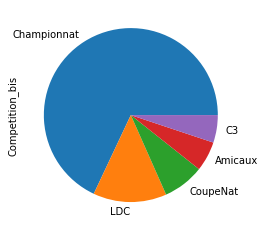

In [438]:
Score['Competition_bis'].value_counts(normalize=True).plot(kind='pie')

In [439]:
comptage_2 = Score['equipe_REF'].value_counts().to_dict()
comptage_2

{'SAINT-ETIENNE (ASSE)': 35,
 'MANCHESTER CITY': 34,
 'LYON (OL)': 34,
 'PARIS-SG (PSG)': 33,
 'MANCHESTER UNITED': 33,
 'ARSENAL': 33,
 'CHELSEA': 32,
 'MONACO (ASM)': 30,
 'MARSEILLE (OM)': 29,
 'SEVILLE FC': 27,
 'VALENCE CF': 27,
 'REAL MADRID': 27,
 'ATLETICO DE MADRID': 27,
 'FC BARCELONE': 26,
 'LEICESTER': 26,
 'BAYERN MUNICH': 26,
 'RB LEIPZIG': 26,
 'INTER MILAN': 26,
 'AS ROME': 26,
 'JUVENTUS TURIN': 26,
 'BORUSSIA DORTMUND': 26,
 'NAPLES': 26,
 'WOLFSBURG': 26,
 'BAYER LEVERKUSEN': 25,
 'AC MILAN': 19}

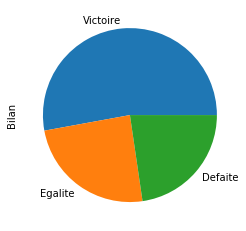

In [440]:
Score['Bilan'].value_counts(normalize=True).plot(kind='pie')

In [441]:
comptage_3 = Score['Bilan'].value_counts().to_dict()
comptage_3

{'Victoire': 359, 'Egalite': 166, 'Defaite': 154}

In [442]:
Score.Tot_but.describe()

count    705.000000
mean       3.032624
std        1.740334
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: Tot_but, dtype: float64

In [443]:
Score.equipe1_goal.describe()

count    705.000000
mean       1.612766
std        1.426855
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: equipe1_goal, dtype: float64

In [444]:
Score.equipe2_goal.describe()

count    705.000000
mean       1.419858
std        1.271252
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: equipe2_goal, dtype: float64

# Modèles

In [445]:
from sklearn.preprocessing import (OneHotEncoder,
                                   LabelEncoder,
                                   StandardScaler,
                                   Normalizer,
                                   MinMaxScaler,
                                  )

In [446]:
from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV,
                                     GridSearchCV,
                                    )

In [447]:
from sklearn.pipeline import make_pipeline

Pour traiter les caractéristiques catégorielles dans notre base de données, qui sont soit sous forme numérique comme "MoisL", ou textuelle comme "Bilan", nous les avons tranformées en étiquettes numériques en utilisant une transformation largement utilisée dans l'apprentissage automatique "OneHotEncoder".

In [448]:
gestion_Bilan = OneHotEncoder()
Bilans = gestion_Bilan.fit_transform(Score["Bilan"].values.reshape(-1, 1))
Bilans.shape

TypeError: argument must be a string or number

In [449]:
gestion_equipe_REF = OneHotEncoder()
Equipe_REF = gestion_equipe_REF.fit_transform(Score["equipe_REF"].values.reshape(-1, 1))
Equipe_REF.shape

(705, 25)

In [450]:
gestion_MoisL = OneHotEncoder()
Mois = gestion_MoisL.fit_transform(Score["MoisL"].values.reshape(-1, 1))
Mois.shape

(705, 12)

In [451]:
gestion_competition_bis = OneHotEncoder()
Competitions_bis = gestion_competition_bis.fit_transform(Score["Competition_bis"].values.reshape(-1, 1))
Competitions_bis.shape


reste = Score[["equipe1_goal", "equipe2_goal"]].values
reste.shape

ValueError: Input contains NaN

In [ ]:
y=Score['Tot_but'].values
y.shape

## Analyse en ACP

Nous faisons une analyse en `ACP` après l'utilisation de `OneHotEncoder`

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(Bilans.toarray())

In [ ]:
print(pca.explained_variance_ratio_) 

In [ ]:
print(pca.singular_values_) 

In [ ]:
pca.explained_variance_ #variance expliquée

In [ ]:
pca.fit(Competitions_bis.toarray())

In [ ]:
pca.explained_variance_ 

In [ ]:
pca.fit(Equipe_REF.toarray())

In [ ]:
pca.explained_variance_ 

In [ ]:
pca.fit(Mois.toarray())

In [ ]:
pca.explained_variance_ 

## Normalisation avec MinMaxScaler

Pour normaliser nos données, nous utilisons la MinMaxScaler qui permet de réduire les écarts entre les valeurs dans un intervalle entre [0,1].

In [ ]:
normalisation = MinMaxScaler()
X = normalisation.fit_transform(np.concatenate((Bilans.toarray(), Equipe_REF.toarray(), Mois.toarray(), Competitions_bis.toarray(), reste), axis=1))
X.shape

## Modèle apprentissage

Avant d'entamer l'estimation de nos données normalisées, nous allons premièrement les séparer en données d'apprentissage et de test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
svr = GridSearchCV(estimator=SVR(), 
                   param_grid=dict(C=[0.01, 0.1, 1, 10, 100],
                                   epsilon=[0.001, 0.01, 0.1, 1, 10, 100]
                                  ),
                   )

In [ ]:
svr.fit(X_train, y_train)

In [ ]:
print(svr.best_params_, svr.best_score_)

In [ ]:
predicteur = svr.best_estimator_

In [ ]:
svr = svr.best_score_
svr

In [ ]:
tableau = pd.DataFrame(index=["SVR_MMS","Random Forest_MMS","SVR uniform_MMS","Random Forest randint_MMS","SVR_SS",
                              "Random Forest_SS","SVR uniform_SS","Random Forest randint_SS","KNN","SVM_MMS","SVM_SS"]
                       ,columns = ['Résultat'])
tableau.Résultat[0]=round(svr,6)

In [ ]:
tableau

## Random Forest

In [ ]:
rfr = GridSearchCV(estimator=RFR(),
                   param_grid=dict(n_estimators=list(range(10, 110, 10)))
                  )

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
print(rfr.best_params_, rfr.best_score_)

In [ ]:
predicteur = rfr.best_estimator_

In [ ]:
rfr = rfr.best_score_
rfr

In [ ]:
tableau.Résultat[1]=round(rfr,6)
tableau

## SVR uniform

In [ ]:
from scipy.stats import uniform

In [ ]:
svr_bis = RandomizedSearchCV(estimator=SVR(),
                             param_distributions=dict(
                                 C=uniform(1, 1000),
                                 epsilon=uniform(1, 1000),
                             ),
                             n_iter=100
                            )

In [ ]:
svr_bis.fit(X_train, y_train)

In [ ]:
print(svr_bis.best_params_, svr_bis.best_score_)

In [ ]:
svr_uni = svr_bis.best_score_
svr_uni

In [ ]:
tableau.Résultat[2]=round(svr_uni,6)
tableau

## Random Forest avec randint

In [ ]:
from scipy.stats import randint

In [ ]:
rfr_bis = RandomizedSearchCV(estimator=RFR(),
                             param_distributions=dict(n_estimators=randint(10, 100)
                             ),
                             n_iter=100
                            )
rfr_bis.fit(X_train, y_train)

In [ ]:
print(rfr_bis.best_params_, rfr_bis.best_score_)

In [ ]:
rfr_choisi = rfr_bis.best_estimator_
rfr_choisi.score(X_train, y_train)

In [ ]:
rfr_rand = rfr_bis.best_score_
rfr_rand

In [ ]:
tableau.Résultat[3]=round(rfr_rand,6)
tableau

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
knn = classifier.score(X_train, y_train)
knn

In [ ]:
tableau.Résultat[8]=round(knn,6)
tableau

## Standardisation avec StandardScaler

Pour standardiser nos données, nous utilisons la méthode de StandardScaler qui permet d'améliorer les modèles prédictifs.

In [ ]:
normalisation_bis = StandardScaler()
X_bis = normalisation_bis.fit_transform(np.concatenate((Bilans.toarray(), Equipe_REF.toarray(), Mois.toarray(), Competitions_bis.toarray(), reste), axis=1))
X_bis.shape

## SVR

In [ ]:
X_train_bis, X_test_bis, y_train, y_test = train_test_split(X_bis, y)

In [ ]:
svr_b = GridSearchCV(estimator=SVR(), 
                   param_grid=dict(C=[0.01, 0.1, 1, 10, 100],
                                   epsilon=[0.001, 0.01, 0.1, 1, 10, 100]
                                  ),
                   )

In [ ]:
svr_b.fit(X_train_bis, y_train)

In [ ]:
print(svr_b.best_params_, svr_b.best_score_)

In [ ]:
predicteur_bis = svr_b.best_estimator_

In [ ]:
svr_SS = svr_b.best_score_
svr_SS

In [ ]:
tableau.Résultat[4]=round(svr_SS,6)
tableau

## Random Forest

In [ ]:
rfr_b = GridSearchCV(estimator=RFR(),
                   param_grid=dict(n_estimators=list(range(10, 110, 10)))
                  )

In [ ]:
rfr_b.fit(X_train_bis, y_train)

In [ ]:
print(rfr_b.best_params_, rfr_b.best_score_)

In [ ]:
predicteur_b = rfr_b.best_estimator_

In [ ]:
rfr_SS = rfr_b.best_score_
rfr_SS

In [ ]:
tableau.Résultat[5]=round(rfr_SS,6)
tableau

## SVR Uniform

In [ ]:
svr_un = RandomizedSearchCV(estimator=SVR(),
                             param_distributions=dict(
                                 C=uniform(1, 1000),
                                 epsilon=uniform(1, 1000),
                             ),
                             n_iter=100
                            )

In [ ]:
svr_un.fit(X_train_bis, y_train)

In [ ]:
print(svr_un.best_params_, svr_un.best_score_)

In [ ]:
svr_uni_SS = svr_un.best_score_
svr_uni_SS

In [ ]:
tableau.Résultat[6]=round(svr_uni_SS,6)
tableau

## Random Forest randint

In [ ]:
rfr_un = RandomizedSearchCV(estimator=RFR(),
                             param_distributions=dict(n_estimators=randint(10, 100)
                             ),
                             n_iter=100
                            )
rfr_un.fit(X_train_bis, y_train)

In [ ]:
rfr_choisi = rfr_un.best_estimator_
print(rfr_un.best_params_)
rfr_rand_SS = rfr_choisi.score(X_train_bis, y_train)
rfr_rand_SS 

In [ ]:
tableau.Résultat[7]=round(rfr_rand_SS,6)
tableau

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
gs_svm = GridSearchCV(
    SVC(),
    {
        "kernel" : ["poly", "rbf", "sigmoid"],
        "C" : [2 ** n for n in range(-10, 5)],
        "gamma" : ["auto"]
    },
    cv=5,
)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
svm = SVC(**gs_svm.best_params_)
svm.fit(X_train, y_train)

In [ ]:
svm_MMS = svm.score(X_train, y_train)
svm_MMS

In [ ]:
score.svm_MMS = svm.score(X_test, y_test)
score.svm_MMS

In [ ]:
tableau.Résultat[9]=round(svm_MMS,6)
tableau

In [ ]:
gs_svm = GridSearchCV(
    SVC(),
    {
        "kernel" : ["poly", "rbf", "sigmoid"],
        "C" : [2 ** n for n in range(-10, 5)],
        "gamma" : ["auto"]
    },
    cv=5,
)
gs_svm.fit(X_train_bis, y_train)
print(gs_svm.best_params_)
svm_bis = SVC(**gs_svm.best_params_)
svm_bis.fit(X_train_bis, y_train)

In [ ]:
svm_SS = svm_bis.score(X_train_bis, y_train)
svm_SS

In [ ]:
score.svm_SS = svm_bis.score(X_test_bis, y_test)
score.svm_SS

In [ ]:
tableau.Résultat[10]=round(svm_SS,6)
tableau

Nous avons réuni les résultats des scores de tous nos modèles dans le tableau ci-dessus. Et nous voyons que les scores obtenus avec les modèles normalisés (MinMaxScaler) sont largement supérieurs aux scores obtenus avec les modèles standardisés (StandardScaler).

### On test sur notre meilleur modèle, le SVR_MMS

In [ ]:
score.svr = predicteur.score(X_test,y_test)
score.svr